In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
# VERİ YÜKLEME 
veriler = pd.read_csv('maaslar.csv')
print(veriler)

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000


In [3]:
# DATAFRAME DİLİMLEME (SLİCE)
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]

In [4]:
# NUMPY DİZİ(ARRAY) DÖNÜŞÜMÜ
X = x.values
Y = y.values

# Linear Regression 

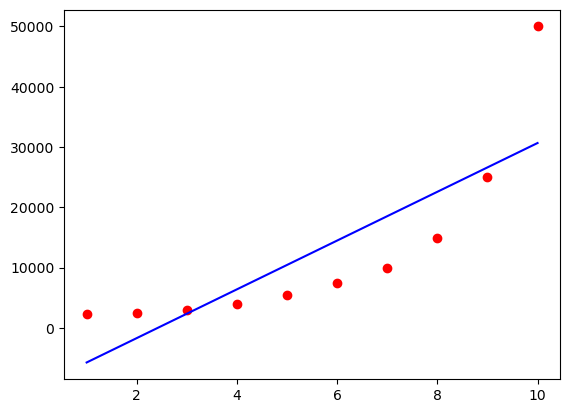

Linear R2 degeri
0.6690412331929894


In [5]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

# Polynomial Regression  

In [7]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


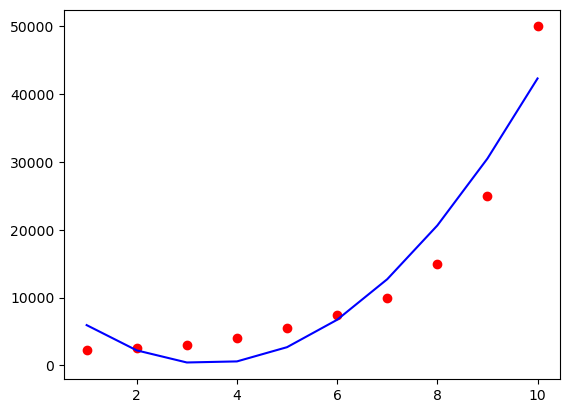

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

In [9]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


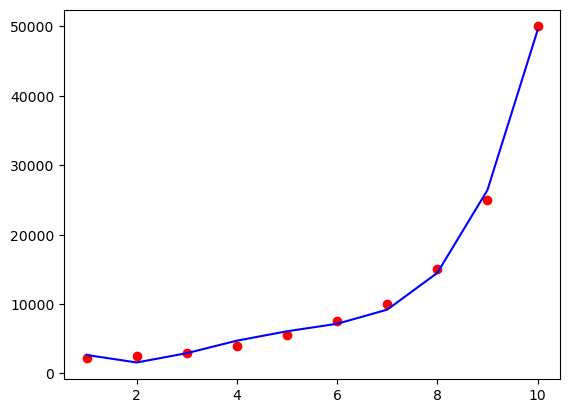

Polynomial R2 degeri
0.9973922891706613


In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()
print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

# Verilerin Ölçeklenmesi 

In [12]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()

x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

# Support Vektor Regression (SVM) 

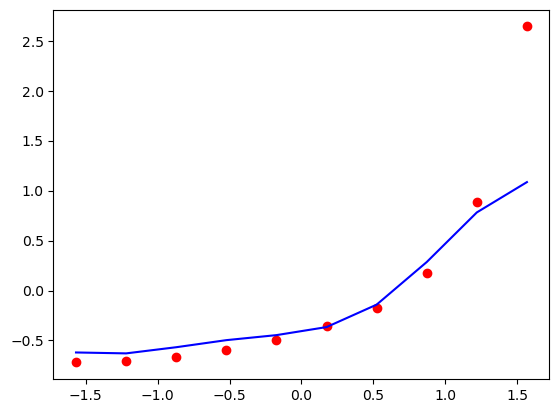

SVR R2 degeri
0.7513836788854973


In [13]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')

plt.show()


print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

# Decision Tree Regression 

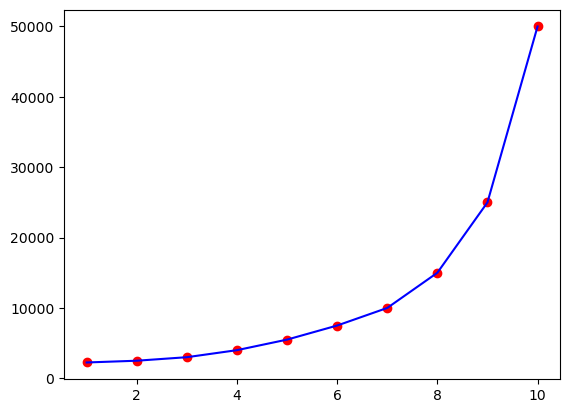

Decision Tree R2 degeri
1.0


In [14]:
#Decision Tree Regresyon
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')
plt.show()

print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

# Random Forest Regression  

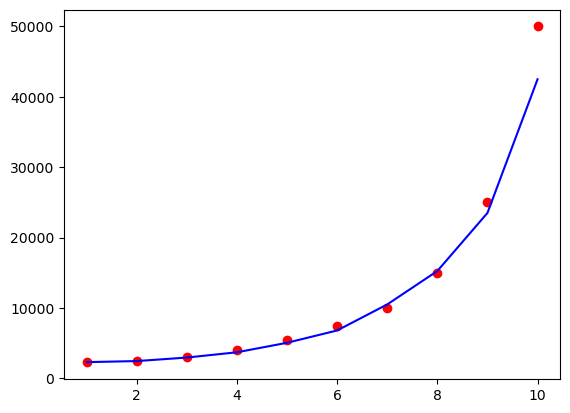

Random Forest R2 degeri
0.9704434230386582


In [15]:
#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X),color='blue')
plt.show()

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

## Özet R2 Degerleri 

In [17]:
#Ozet R2 değerleri
print('-----------------------')
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

-----------------------
Linear R2 degeri
0.6690412331929894
Polynomial R2 degeri
0.9973922891706613
SVR R2 degeri
0.7513836788854973
Decision Tree R2 degeri
1.0
Random Forest R2 degeri
0.9704434230386582
